# Analyzing and Visualizing a Loan Dataset
## by Alf

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# pld will be short for prosperLoanData
pld = pd.read_csv('prosperLoanData.csv')

In [3]:
# show all of the columns
pd.options.display.max_columns = None
pld.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [4]:
pld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
pld.shape

(113937, 81)

In [6]:
pld.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [7]:
#features_corr = ['Term', 'LoanStatus', 'BorrowerRate', 'LenderYield', 'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'AvailableBankcardCredit', 'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment']
features_corr = ['Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (numeric)', 'ListingCategory (numeric)', 'BorrowerState', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'InquiriesLast6Months', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'AvailableBankcardCredit', 'DebtToIncomeRatio', 'IncomeRange', 'StatedMonthlyIncome', 'LoanOriginalAmount']
temp2_df = pld[features_corr]
corr_big = temp2_df.corr()
corr_big

,Term,BorrowerRate,ProsperRating (numeric),ListingCategory (numeric),EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeUpper,CurrentCreditLines,InquiriesLast6Months,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast12Months,RevolvingCreditBalance,AvailableBankcardCredit,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount
Term,1.000000,0.020085,0.079179,0.004947,0.082476,0.085339,0.126263,0.077072,-0.113568,-0.083807,-0.016459,-0.041492,-0.026252,0.026022,0.015348,-0.014670,0.028479,0.338927
BorrowerRate,0.020085,1.000000,-0.953105,0.102913,-0.019907,-0.134431,-0.461567,-0.097473,0.183810,0.176530,0.065645,0.170279,0.051169,-0.059608,-0.343861,0.062917,-0.088982,-0.328960
ProsperRating (numeric),0.079179,-0.953105,1.000000,-0.094474,0.036073,0.136470,0.548874,0.092377,-0.264305,-0.145205,-0.051071,-0.147149,-0.035791,0.062068,0.374432,-0.135344,0.094306,0.428557
ListingCategory (numeric),0.004947,0.102913,-0.094474,1.000000,-0.005544,-0.038224,0.102400,-0.105035,-0.072644,-0.049936,0.022202,0.016950,0.003167,-0.050053,-0.031517,-0.042754,0.001599,-0.127130
EmploymentStatusDuration,0.082476,-0.019907,0.036073,-0.005544,1.000000,0.171046,0.081134,0.140493,-0.048024,-0.009078,0.008185,0.012221,-0.003918,0.118320,0.053008,-0.011609,0.069830,0.098149
IsBorrowerHomeowner,0.085339,-0.134431,0.136470,-0.038224,0.171046,1.000000,0.293516,0.278295,0.006893,-0.055454,0.038122,-0.070798,-0.015016,0.224649,0.142039,0.000177,0.140051,0.206787
CreditScoreRangeUpper,0.126263,-0.461567,0.548874,0.102400,0.081134,0.293516,1.000000,0.142092,-0.262135,-0.368450,-0.065849,-0.251219,-0.083443,0.088848,0.453257,-0.013169,0.107901,0.340874
CurrentCreditLines,0.077072,-0.097473,0.092377,-0.105035,0.140493,0.278295,0.142092,1.000000,0.069662,-0.165860,-0.072590,-0.180398,-0.059379,0.333656,0.318165,0.091878,0.143329,0.201383
InquiriesLast6Months,-0.113568,0.183810,-0.264305,-0.072644,-0.048024,0.006893,-0.262135,0.069662,1.000000,0.156342,0.023969,0.090329,0.048873,-0.007397,-0.004564,0.024436,0.014854,-0.102878
CurrentDelinquencies,-0.083807,0.176530,-0.145205,-0.049936,-0.009078,-0.055454,-0.368450,-0.165860,0.156342,1.000000,0.340549,0.377777,0.111661,-0.088831,-0.092433,-0.024265,-0.038835,-0.172139


In [8]:
pld.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [9]:
print(list(pld.columns))

['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'Deb

In [10]:
pld.ListingKey.nunique()

113066

In [11]:
# there are 113937 records and 113066 unique listing keys. I will verify quickly if these are duplicates.
key_counts = pld.ListingKey.value_counts()
key_counts

17A93590655669644DB4C06    6
349D3587495831350F0F648    4
DE8535960513435199406CE    4
47C1359638497431975670B    4
8474358854651984137201C    4
                          ..
A75A3527176780302108467    1
46073594951039297131580    1
64F73394914779070B69C80    1
64513486931818790D0C1E6    1
4C02356141219971003613B    1
Name: ListingKey, Length: 113066, dtype: int64

In [12]:
key_counts.value_counts()

1    112239
2       790
3        32
4         4
6         1
Name: ListingKey, dtype: int64

In [13]:
dup_idx = pld[pld.ListingKey.duplicated()]['ListingKey']
print(type(dup_idx))
print(dup_idx[:10])

<class 'pandas.core.series.Series'>
9       0F043596202561788EA13D5
999     0A0635972629771021E38F3
2539    2D2635984503681189056B4
4942    4B7E3590031274113F1FD34
5812    94B035909835592957503E6
5971    2EC635885737984509D5366
6385    083235967773321272C26B9
7415    5A2F35875117483773421B0
7538    09AD35918712001025AC1BD
7555    021F3593082999771F5E621
Name: ListingKey, dtype: object


In [14]:
tt = dup_idx.tolist()
tt
len(tt)

871

In [15]:
dup_listing_idx = set(dup_idx.tolist())
len(dup_listing_idx)

827

##### Note:
dup_listing_idx are the listing keys that have duplicates. I will remove their duplicates but keep the first. I will then assign a -1 in their ProsperScore to mark them as to be "corrected"

In [16]:
sub_cols = ['ProsperScore', 'ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginalAmount', 'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey', 'MonthlyLoanPayment', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations', 'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount', 'Investors']

In [17]:
# examine one ListingKey and see in which column the listings differ
check_dups_df = pld[pld.ListingKey == '17A93590655669644DB4C06']
# make sure that it is NOT spacing that makes a difference in non-duplicates
check_dups_df = check_dups_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
#duplicaterows = check_dups_df[check_dups_df.duplicated(sub_cols)] 
#temp_df.to_csv('dupes.csv', index=None)

In [18]:
check_dups_df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
13078,17A93590655669644DB4C06,951186,2013-10-02 17:20:16.550000000,NaN,60,Current,NaN,0.16662,0.1435,0.1335,0.1264,0.0524,0.074,5.0,B,4.0,1,MD,Other,Employed,26.0,False,False,NaN,2013-12-23 09:38:12,720.0,739.0,1986-12-26 00:00:00,12.0,12.0,20.0,6,348.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,14635.0,0.57,10865.0,17.0,1.0,0.0,0.41,"$25,000-49,999",True,3000.0,CB1B37030986463208432A1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,126059,10000,2014-01-13 00:00:00,Q1 2014,F80D3694083622957BA09F2,234.5,234.5,112.62,121.88,-8.49,0.0,0.0,0.0,0.0,1.0,0,0,0.0,96
14888,17A93590655669644DB4C06,951186,2013-10-02 17:20:16.550000000,NaN,60,Current,NaN,0.16662,0.1435,0.1335,0.1264,0.0524,0.074,5.0,B,8.0,1,MD,Other,Employed,26.0,False,False,NaN,2013-12-23 09:38:12,720.0,739.0,1986-12-26 00:00:00,12.0,12.0,20.0,6,348.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,14635.0,0.57,10865.0,17.0,1.0,0.0,0.41,"$25,000-49,999",True,3000.0,CB1B37030986463208432A1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,126059,10000,2014-01-13 00:00:00,Q1 2014,F80D3694083622957BA09F2,234.5,234.5,112.62,121.88,-8.49,0.0,0.0,0.0,0.0,1.0,0,0,0.0,96
20569,17A93590655669644DB4C06,951186,2013-10-02 17:20:16.550000000,NaN,60,Current,NaN,0.16662,0.1435,0.1335,0.1264,0.0524,0.074,5.0,B,7.0,1,MD,Other,Employed,26.0,False,False,NaN,2013-12-23 09:38:12,720.0,739.0,1986-12-26 00:00:00,12.0,12.0,20.0,6,348.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,14635.0,0.57,10865.0,17.0,1.0,0.0,0.41,"$25,000-49,999",True,3000.0,CB1B37030986463208432A1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,126059,10000,2014-01-13 00:00:00,Q1 2014,F80D3694083622957BA09F2,234.5,234.5,112.62,121.88,-8.49,0.0,0.0,0.0,0.0,1.0,0,0,0.0,96
31450,17A93590655669644DB4C06,951186,2013-10-02 17:20:16.550000000,NaN,60,Current,NaN,0.16662,0.1435,0.1335,0.1264,0.0524,0.074,5.0,B,10.0,1,MD,Other,Employed,26.0,False,False,NaN,2013-12-23 09:38:12,720.0,739.0,1986-12-26 00:00:00,12.0,12.0,20.0,6,348.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,14635.0,0.57,10865.0,17.0,1.0,0.0,0.41,"$25,000-49,999",True,3000.0,CB1B37030986463208432A1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,126059,10000,2014-01-13 00:00:00,Q1 2014,F80D3694083622957BA09F2,234.5,234.5,112.62,121.88,-8.49,0.0,0.0,0.0,0.0,1.0,0,0,0.0,96
42750,17A93590655669644DB4C06,951186,2013-10-02 17:20:16.550000000,NaN,60,Current,NaN,0.16662,0.1435,0.1335,0.1264,0.0524,0.074,5.0,B,5.0,1,MD,Other,Employed,26.0,False,False,NaN,2013-12-23 09:38:12,720.0,739.0,1986-12-26 00:00

In [19]:
temp_cols = ['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginalAmount', 'LoanOriginationDate', 'LoanOriginationQuarter', 'MemberKey', 'MonthlyLoanPayment', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations', 'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount', 'Investors']

In [20]:
# Exclude the column ProsperScore, then see if the duplicates are dropped
check_dups_df.drop_duplicates(subset=temp_cols, inplace=True, keep='first')
check_dups_df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
13078,17A93590655669644DB4C06,951186,2013-10-02 17:20:16.550000000,NaN,60,Current,NaN,0.16662,0.1435,0.1335,0.1264,0.0524,0.074,5.0,B,4.0,1,MD,Other,Employed,26.0,False,False,NaN,2013-12-23 09:38:12,720.0,739.0,1986-12-26 00:00:00,12.0,12.0,20.0,6,348.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,14635.0,0.57,10865.0,17.0,1.0,0.0,0.41,"$25,000-49,999",True,3000.0,CB1B37030986463208432A1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,126059,10000,2014-01-13 00:00:00,Q1 2014,F80D3694083622957BA09F2,234.5,234.5,112.62,121.88,-8.49,0.0,0.0,0.0,0.0,1.0,0,0,0.0,96


### Notes:

The rows above were identical except in column ProsperScore.
Although initially since they were inconsistently assigned, I thought they should be dropped.
I think now I will take the opportunity to see if I can correct these "errors"


In [21]:
pld.corr()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
ListingNumber,1.000000,0.319971,-0.031520,-0.114391,-0.113544,-0.217721,-0.239568,-0.461391,0.209200,-0.106235,0.127062,0.156224,0.076745,-0.439653,0.269395,0.269395,0.145621,0.195707,0.130369,0.232109,0.184101,-0.298941,-0.280228,-0.233326,-0.024627,-0.078336,-0.045467,-0.073151,0.057056,0.086053,0.036690,0.134729,0.254659,-0.084531,-0.041810,-0.024027,0.076113,0.174834,0.131672,0.132063,0.020873,-0.005101,0.252583,0.164248,-0.126409,-0.370226,-0.155062,-0.939179,0.995095,0.340360,0.277267,-0.380814,-0.366555,-0.281170,0.208286,0.104191,-0.251739,-0.247716,-0.096004,0.014688,-0.126031,-0.092813,-0.053481,-0.279659
Term,0.319971,1.000000,-0.011183,0.020085,0.020556,0.057047,-0.107140,0.152505,0.079179,0.028947,0.004947,0.082476,0.085339,-0.143751,0.126263,0.126263,0.077072,0.096309,0.076528,0.093637,0.084049,-0.113568,-0.103132,-0.083807,-0.016459,-0.041492,-0.029512,-0.026252,0.026022,0.031535,0.015348,0.079650,0.119342,-0.029476,-0.014670,0.040402,0.028479,0.070311,0.002462,0.003147,-0.002912,-0.008328,0.130493,0.153372,-0.048157,-0.134134,-0.070819,-0.342130,0.335610,0.338927,0.091026,-0.069696,-0.128255,0.158890,-0.167600,0.035841,-0.038353,-0.035981,-0.034157,-0.028806,-0.056680,-0.043507,-0.024472,-0.045137
BorrowerAPR,-0.031520,-0.011183,1.000000,0.989824,0.989329,0.895635,0.949538,0.794275,-0.962151,-0.668287,0.132456,-0.008589,-0.132823,-0.054567,-0.429707,-0.429707,-0.093481,-0.098860,0.002513,-0.110202,-0.043365,0.146119,0.114546,0.149404,0.065679,0.162225,0.122793,0.044095,-0.058539,0.261438,-0.348926,-0.041894,-0.241349,0.103527,0.056327,-0.109975,-0.082338,-0.041467,0.031399,0.018632,0.091034,0.055345,-0.206209,-0.090347,-0.231962,0.088032,-0.185956,-0.073773,-0.036269,-0.322887,-0.226653,-0.111350,-0.180445,0.169726,0.116974,-0.041452,0.067301,0.067385,0.028519,-0.028236,-0.044236,-0.046757,-0.031841,-0.307606
BorrowerRate,-0.114391,0.020085,0.989824,1.000000,0.999211,0.895282,0.945297,0.817670,-0.953105,-0.649736,0.102913,-0.019907,-0.134431,-0.001964,-0.461567,-0.461567,-0.097473,-0.105998,-0.005793,-0.125987,-0.055628,0.183810,0.153129,0.176530,0.065645,0.170279,0.128314,0.051169,-0.059608,0.255482,-0.343861,-0.048211,-0.261189,0.114538,0.062917,-0.099540,-0.088982,-0.049270,0.019217,0.006996,0.085770,0.050770,-0.206461,-0.085685,-0.217155,0.136244,-0.172936,0.020420,-0.118721,-0.328960,-0.244742,-0.081055,-0.153722,0.200479,0.095993,-0.053378,0.100635,0.100308,0.042059,-0.029025,-0.030579,-0.037312,-0.026512,-0.274217
LenderYield,-0.113544,0.020556,0.989329,0.999211,1.000000,0.895343,0.945308,0.817654,-0.953119,-0.649783,0.104395,-0.018954,-0.132993,-0.012683,-0.454350,-0.454350,-0.

In [22]:
# there is some strange inconsistency in way prosper give prosperscore.
# for example, the loan with listingkey 17A93590655669644DB4C06 has exactly the data in all the other columns
# EXCEPT for prosperScore which had 4, 8, 7, 10, 5, 6 in content. BIZARRE!!
# For that reason, I will drop the column prosperscore, and then drop_duplicates
len(temp_cols)

80

In [23]:
#tpld = pld.drop(['ProsperScore'], axis=1)
tpld = pld.copy()

In [24]:
tpld.shape

(113937, 81)

In [25]:
# trim spaces again to make sure it is not spaces that make a difference
tpld = tpld.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

## Remove Duplicates

### Note:

Before I remove the duplicated rows, I would like to record the range of prosperScores that the listing keys were assigned

In [28]:
# dup_listing_idx contains the keys that have duplicates: tpld.loc[dup_listing_idx]
lk_ps_df = tpld[tpld.ListingKey.isin(dup_listing_idx)][['ListingKey', 'ProsperScore']]

In [29]:
lk_ps_df = lk_ps_df.sort_values(by=['ListingKey', 'ProsperScore'])
lk_ps_df.count()

ListingKey      1698
ProsperScore    1698
dtype: int64

In [30]:
# create a new column ProsperScoreRange and set index to ListingKey
lk_ps_df['ProsperScoreRange'] = None
lk_ps_df = lk_ps_df.set_index(['ListingKey'])

In [31]:
# create a dictionary with key as ListingKey and the ProsperScore range as value
psr_dict = {}
for lk in dup_listing_idx:
    psr_dict[lk] = lk_ps_df.loc[lk]['ProsperScore'].tolist()
list(psr_dict.items())[:10]

[('17E035962771170915118B7', [3.0, 4.0]),
 ('57FF3599497363357E92D06', [7.0, 10.0]),
 ('0E0F3595663074287D094F4', [5.0, 6.0]),
 ('4F553593336980202305994', [3.0, 9.0]),
 ('956F36010216190557AA088', [4.0, 5.0]),
 ('67823591978873861170B6E', [3.0, 4.0]),
 ('09233589620788733CFB8CE', [2.0, 3.0]),
 ('FFE13600149501913291BF7', [2.0, 4.0]),
 ('8A2E3591654743995DD0CFC', [8.0, 9.0]),
 ('5F4E3602723052710F54FB0', [2.0, 3.0])]

In [32]:
# place all the new range value from the dictionary into dataframe
for k, v in psr_dict.items():
    vstr = [str(i) for i in v] # convert the list into strings
    yy = ",".join(vstr)
    lk_ps_df.loc[k, 'ProsperScoreRange'] = yy

In [33]:
lk_ps_df.head(10)

,ProsperScore,ProsperScoreRange
ListingKey,,
00223594917038064A7C947,5.0,"5.0,6.0"
00223594917038064A7C947,6.0,"5.0,6.0"
00473590513960687DD308F,4.0,"4.0,6.0"
00473590513960687DD308F,6.0,"4.0,6.0"
0098360461900952056DB93,2.0,"2.0,4.0"
0098360461900952056DB93,4.0,"2.0,4.0"
01163604029146842E28D9C,2.0,"2.0,3.0"
01163604029146842E28D9C,3.0,"2.0,3.0"
014F35910923350802E1B29,4.0,"4.0,7.0"


In [34]:
# reset the index then drop the column ProsperScore from lk_ps_df
lk_ps_df.reset_index(inplace=True)
lk_ps_df = lk_ps_df.drop(['ProsperScore'], axis=1)

In [35]:
lk_ps_df.count()

ListingKey           1698
ProsperScoreRange    1698
dtype: int64

In [36]:
# now remove all the duplicates on ListingKey
lk_ps_df.drop_duplicates(subset=['ListingKey'], inplace=True, keep='first')

In [37]:
lk_ps_df.count()

ListingKey           827
ProsperScoreRange    827
dtype: int64

### Note:
The count above matches the count of dup_listing_idx

In [38]:
# quickly examine the listing keys in my working dataframe tpld
# the temp_cols list is the list of columns without ProsperScore
duplicaterows = tpld[tpld.duplicated(temp_cols)]
duplicaterows.ListingKey.value_counts()

17A93590655669644DB4C06    5
349D3587495831350F0F648    3
8474358854651984137201C    3
47C1359638497431975670B    3
DE8535960513435199406CE    3
                          ..
668D3596407056998D52C5D    1
176D3594206302808E74457    1
D02A3595438441481FC02B7    1
5D683598600188069477426    1
359F36006583392169BF3F3    1
Name: ListingKey, Length: 827, dtype: int64

In [39]:
# backup tpld
tpld_backup = tpld.copy()

In [40]:
# drop all the duplicates in tpld based on temp_cols subset (i.e., without ProsperScore)
tpld.drop_duplicates(subset=temp_cols, inplace=True, keep='first')

In [41]:
# merge the two df tpld and lk_ps_df on ListingKey
tpld = pd.merge(tpld, lk_ps_df, on=['ListingKey'], how='left')
tpld.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ProsperScoreRange
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,NaN
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,NaN
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,NaN
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,NaN
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.1

In [42]:
new_key_counts = tpld.ListingKey.value_counts()
new_key_counts.value_counts()

1    113066
Name: ListingKey, dtype: int64

In [43]:
tpld.shape

(113066, 82)

In [44]:
tpld.ProsperScore.value_counts()

4.0     12443
6.0     12161
8.0     11953
7.0     10489
5.0      9732
3.0      7565
9.0      6865
2.0      5706
10.0     4691
11.0     1431
1.0       946
Name: ProsperScore, dtype: int64

In [45]:
tpld['ProsperRating (Alpha)'].value_counts()

C     18096
B     15368
A     14390
D     14170
E      9716
HR     6917
AA     5325
Name: ProsperRating (Alpha), dtype: int64

In [46]:
tpld['ProsperRating (numeric)'].value_counts()

4.0    18096
5.0    15368
6.0    14390
3.0    14170
2.0     9716
1.0     6917
7.0     5325
Name: ProsperRating (numeric), dtype: int64

In [47]:
tpld['CreditGrade'].value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

### Notes:

ProsperRating alpha and numeric match exactly in count. CreditGrade has the same letter grades as ProsperRating. Prosper's variable definitions did not specify if the grading system in ProsperRating and CreditGrade. I am hoping that upon analysis below that it confirms that they are the same grading system.

In [48]:
pld.shape[0] - tpld.shape[0]

871

In [49]:
#select_features = ['EmploymentStatus', 'LoanOriginalAmount', 'CreditScoreRangeUpper', 'LoanStatus', 'BorrowerRate', 'StatedMonthlyIncome', 'ProsperRating (numeric)', 'ListingCategory (numeric)', 'IsBorrowerHomeowner']
select_features = ['ListingKey', 'EmploymentStatusDuration', 'EmploymentStatus', 'LoanOriginalAmount', 'CreditGrade', 'ProsperRating (numeric)', 'ProsperScore', 'ProsperScoreRange', 'BorrowerRate', 'CreditScoreRangeUpper', 'CurrentDelinquencies', 'IsBorrowerHomeowner', 'CurrentCreditLines', 'AvailableBankcardCredit']
df = tpld[select_features]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113065
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ListingKey                113066 non-null  object 
 1   EmploymentStatusDuration  105441 non-null  float64
 2   EmploymentStatus          110811 non-null  object 
 3   LoanOriginalAmount        113066 non-null  int64  
 4   CreditGrade               28953 non-null   object 
 5   ProsperRating (numeric)   83982 non-null   float64
 6   ProsperScore              83982 non-null   float64
 7   ProsperScoreRange         827 non-null     object 
 8   BorrowerRate              113066 non-null  float64
 9   CreditScoreRangeUpper     112475 non-null  float64
 10  CurrentDelinquencies      112369 non-null  float64
 11  IsBorrowerHomeowner       113066 non-null  bool   
 12  CurrentCreditLines        105462 non-null  float64
 13  AvailableBankcardCredit   105522 non-null  f

In [50]:
df.shape

(113066, 14)

In [51]:
# There is a lot of nulls. what to do?
# drop listingnumber, borrowerapr (seems similar to borrowerrate), Investmentfromfriendscount, investmentfromfriendsamount,
# percentfunded (nearly 100%)
df.corr()

,EmploymentStatusDuration,LoanOriginalAmount,ProsperRating (numeric),ProsperScore,BorrowerRate,CreditScoreRangeUpper,CurrentDelinquencies,IsBorrowerHomeowner,CurrentCreditLines,AvailableBankcardCredit
EmploymentStatusDuration,1.000000,0.098219,0.036075,-0.008019,-0.019629,0.081551,-0.009143,0.171195,0.140589,0.052818
LoanOriginalAmount,0.098219,1.000000,0.429202,0.265919,-0.328339,0.341488,-0.172189,0.206859,0.200852,0.229751
ProsperRating (numeric),0.036075,0.429202,1.000000,0.706682,-0.953102,0.549401,-0.145456,0.136271,0.092155,0.375025
ProsperScore,-0.008019,0.265919,0.706682,1.000000,-0.651294,0.370050,-0.101107,0.063464,-0.009333,0.319400
BorrowerRate,-0.019629,-0.328339,-0.953102,-0.651294,1.000000,-0.461342,0.176404,-0.134316,-0.097062,-0.344172
CreditScoreRangeUpper,0.081551,0.341488,0.549401,0.370050,-0.461342,1.000000,-0.368845,0.294119,0.141847,0.453301
CurrentDelinquencies,-0.009143,-0.172189,-0.145456,-0.101107,0.176404,-0.368845,1.000000,-0.055865,-0.165982,-0.092643
IsBorrowerHomeowner,0.171195,0.206859,0.136271,0.063464,-0.134316,0.294119,-0.055865,1.000000,0.278930,0.142155
CurrentCreditLines,0.140589,0.200852,0.092155,-0.009333,-0.097062,0.141847,-0.165982,0.278930,1.000000,0.317422
AvailableBankcardCredit,0.052818,0.229751,0.375025,0.319400,-0.344172,0.453301,-0.092643,0.142155,0.317422,1.000000


In [52]:
df.describe()

,EmploymentStatusDuration,LoanOriginalAmount,ProsperRating (numeric),ProsperScore,BorrowerRate,CreditScoreRangeUpper,CurrentDelinquencies,CurrentCreditLines,AvailableBankcardCredit
count,105441.000000,113066.000000,83982.000000,83982.000000,113066.000000,112475.000000,112369.000000,105462.000000,105522.000000
mean,96.060584,8314.762307,4.068705,5.952871,0.192946,704.524961,0.595129,10.307058,11208.182028
std,94.432241,6237.007841,1.675442,2.373897,0.074917,66.635895,1.984234,5.458196,19847.681185
min,0.000000,1000.000000,1.000000,1.000000,0.000000,19.000000,0.000000,0.000000,0.000000
25%,26.000000,4000.000000,3.000000,4.000000,0.134000,679.000000,0.000000,7.000000,876.000000
50%,67.000000,6300.000000,4.000000,6.000000,0.184000,699.000000,0.000000,10.000000,4090.000000
75%,137.000000,12000.000000,5.000000,8.000000,0.250600,739.000000,0.000000,13.000000,13165.000000
max,755.000000,35000.000000,7.000000,11.000000,0.497500,899.000000,83.000000,59.000000,646285.000000


In [53]:
df.isnull().sum()

ListingKey                       0
EmploymentStatusDuration      7625
EmploymentStatus              2255
LoanOriginalAmount               0
CreditGrade                  84113
ProsperRating (numeric)      29084
ProsperScore                 29084
ProsperScoreRange           112239
BorrowerRate                     0
CreditScoreRangeUpper          591
CurrentDelinquencies           697
IsBorrowerHomeowner              0
CurrentCreditLines            7604
AvailableBankcardCredit       7544
dtype: int64

In [54]:
print(list(df.columns))

['ListingKey', 'EmploymentStatusDuration', 'EmploymentStatus', 'LoanOriginalAmount', 'CreditGrade', 'ProsperRating (numeric)', 'ProsperScore', 'ProsperScoreRange', 'BorrowerRate', 'CreditScoreRangeUpper', 'CurrentDelinquencies', 'IsBorrowerHomeowner', 'CurrentCreditLines', 'AvailableBankcardCredit']


### What is the structure of your dataset?

The original dataset had (113937, 81). After discovering that Prosper had inconsistencies in using the feature ProsperScore, I added a new column called ProsperScoreRange. I then dropped all the duplicated rows but keeping the first among the duplicated. The new shape is (113937, 82). With the selected features, the final shape is (113066, 14)

### What is/are the main feature(s) of interest in your dataset?

ProsperRating and BorrowerRate features are interesting. I would like to see if it's predictable based on some features. The BorrowerRate is highly correlated to ProsperRating so I believe BorrowerRate is derivative. I would like to keep track of these 2 features based on the features below.

Initially, I was interested in predicting ProsperRating. It is however highly correlative to BorrowerRate. But some samples do not have ProsperRating but they all have BorrowerRate. Ultimately if this is a automation or machine learning problem. If I choose to predict ProsperRating, it would be a classification problem. If I choose BorrowerRate, it would be a regression problem. Since it is not the purpose of this project, I will leave the automation problem for a future task.

I will attempt to correct the ProsperScore on those index that had duplicates in exploration.

Since ProsperRating and CreditGrade are mutually exclusive, I will also combine them in a new column. They both have BorrowerRate. So I will examine if they correlate with BorrowerRate.

I will examine in bivariate section how CreditGrade's relationship to BorrowerRate compares with that of PropserRating.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I will investigate the following features.

'ListingKey', 'EmploymentStatusDuration', 'EmploymentStatus', 'LoanOriginalAmount', 'CreditGrade', 'ProsperRating (numeric)', 'ProsperScore', 'ProsperScoreRange', 'BorrowerRate', 'CreditScoreRangeUpper', 'CurrentDelinquencies', 'IsBorrowerHomeowner', 'CurrentCreditLines', 'AvailableBankcardCredit'

And keep track of these 2 features against the features above.
'BorrowerRate', 'ProsperRating (numeric)'

I retained the ListingKey so I can continue to process below.

In [55]:
df = df.rename(columns={'ProsperRating (numeric)': 'ProsperRating'})

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [56]:
# set a base color palette
pleasant = sb.color_palette()[0]

#### Although I will compare in bivariate analysis later the relationship between EmploymentStatus and EmloymentStatusDuration, I will do them here one-by-one first.

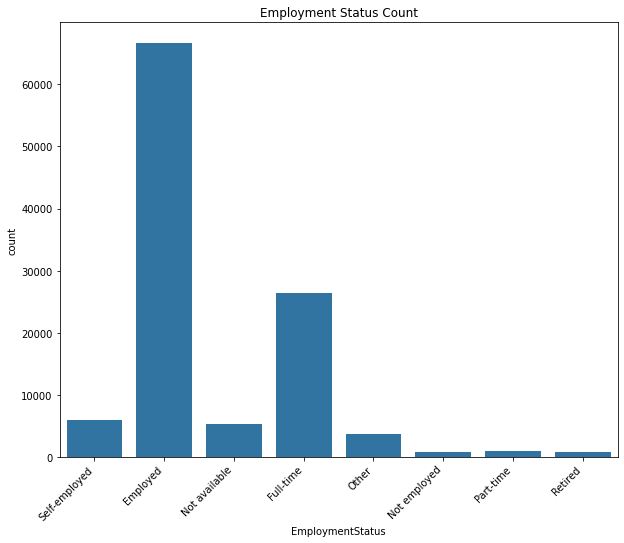

In [57]:
#fig, ax = plt.subplots(figsize=(10,8))
#df.EmploymentStatus.plot(kind='bar', ax=ax)
#plt.show();
plt.figure(figsize=(10,8))
sb.countplot(data = df, x='EmploymentStatus', color=pleasant)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Employment Status Count');

Text(0.5, 1.0, 'Employment Duration in months')

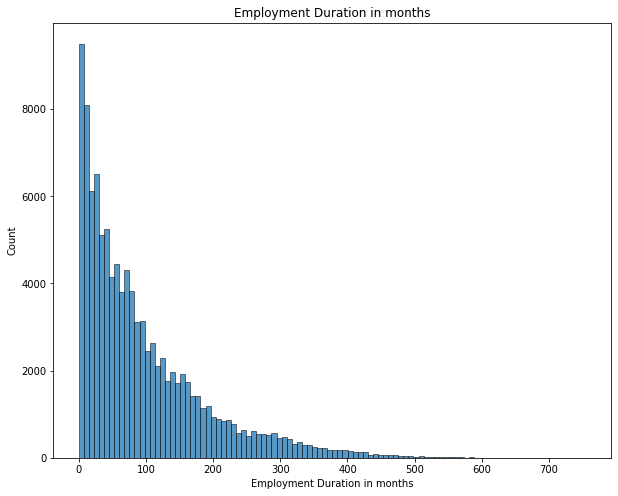

In [58]:
plt.figure(figsize=(10,8))
sb.histplot(data=df, x='EmploymentStatusDuration', color=pleasant, bins=100)
plt.xlabel('Employment Duration in months')
plt.title('Employment Duration in months')

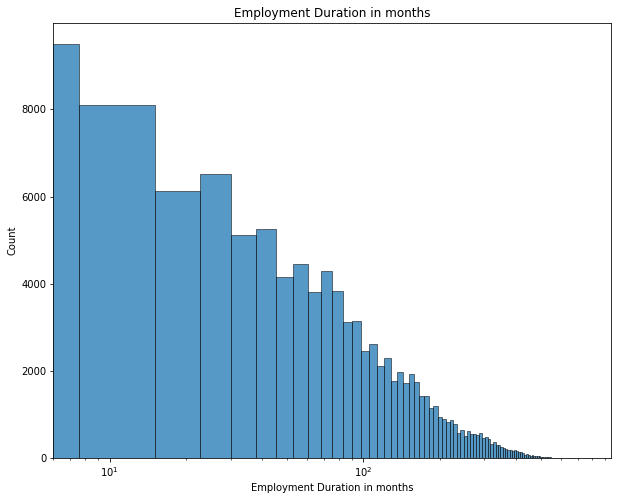

In [60]:
plt.figure(figsize=(10,8))
sb.histplot(data=df, x='EmploymentStatusDuration', color=pleasant, bins=100)
plt.xscale('log')
plt.xlabel('Employment Duration in months')
plt.title('Employment Duration in months');

right-skewed. Most people worked below 100 months in their current employment status

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

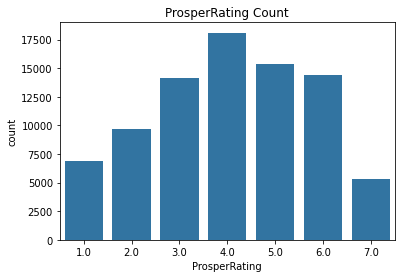

In [61]:
sb.countplot(data=df, x='ProsperRating', color=pleasant)
plt.title('ProsperRating Count');

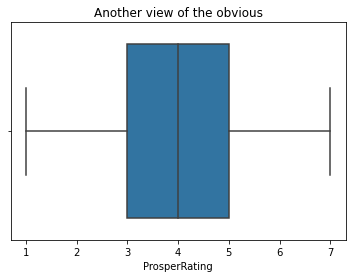

In [62]:
sb.boxplot(data=df, x='ProsperRating')
plt.title('Another view of the obvious');

Text(0.5, 1.0, 'ProsperScore Count')

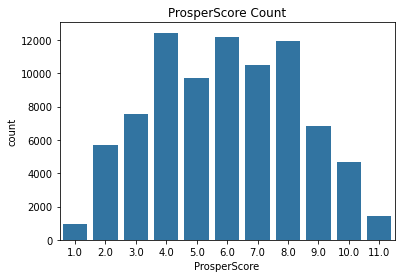

In [63]:
sb.countplot(data=df, x='ProsperScore', color=pleasant)
plt.title('ProsperScore Count')

#### Note:

Both ProsperScore and ProsperRating seem to be ordinal. It is not clear to me whether bigger score is better or worse. I will examine further. However, they both seem to have a normal distribution. The Prosper Loan Dictionary did not specify which one is best.

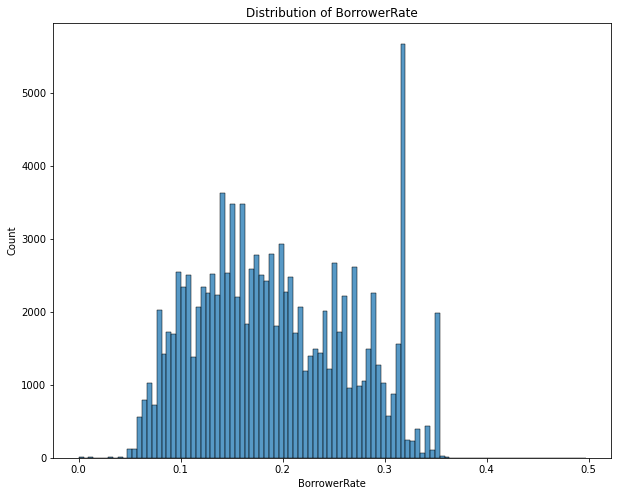

In [64]:
plt.figure(figsize=(10,8))
sb.histplot(data=df, x='BorrowerRate', color=pleasant)
plt.title('Distribution of BorrowerRate');

/home/nemo/miniconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


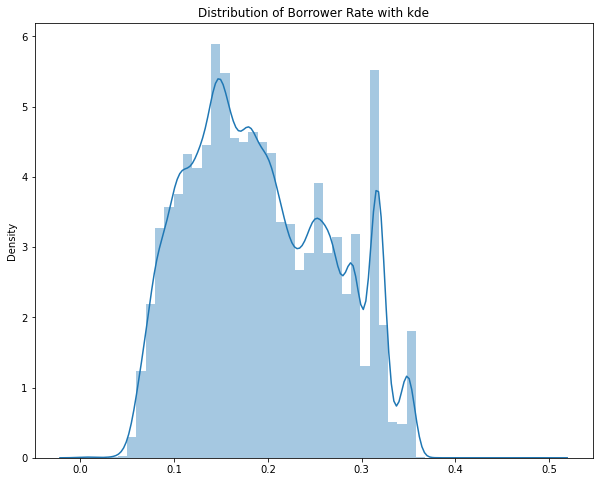

In [65]:
plt.figure(figsize=(10,8))
sb.distplot(x=df.BorrowerRate, color=pleasant)
plt.title('Distribution of Borrower Rate with kde');

### Notes:

There's a lot of humps here. multimodal. It seems most loans had borrower rate between .1 and .2. However, there are also many between .2 and .3 and a really huge hump just above .3.

<ipython-input-66-55d468fa913c>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(['LoanOriginalAmount', 'CreditScoreRangeUpper', 'CurrentDelinquencies', 'CurrentCreditLines', 'AvailableBankcardCredit'], ax=ax);


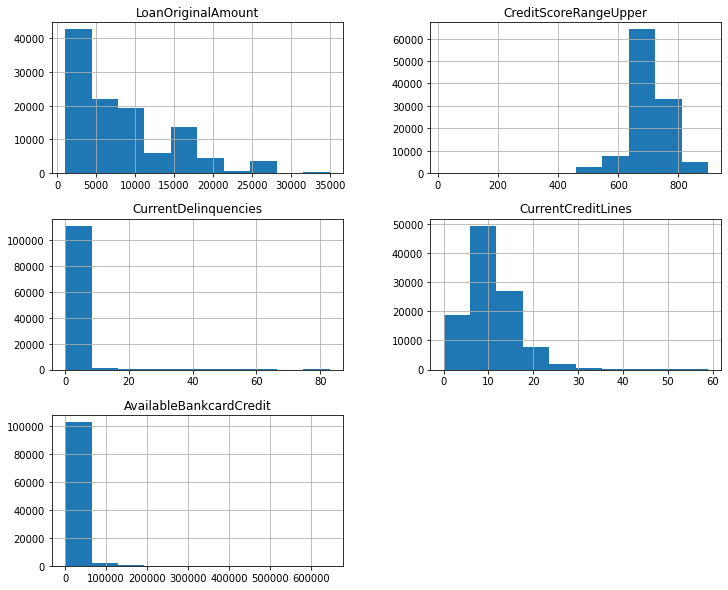

In [66]:
fig, ax = plt.subplots(figsize=(12,10))
#, 
df.hist(['LoanOriginalAmount', 'CreditScoreRangeUpper', 'CurrentDelinquencies', 'CurrentCreditLines', 'AvailableBankcardCredit'], ax=ax);

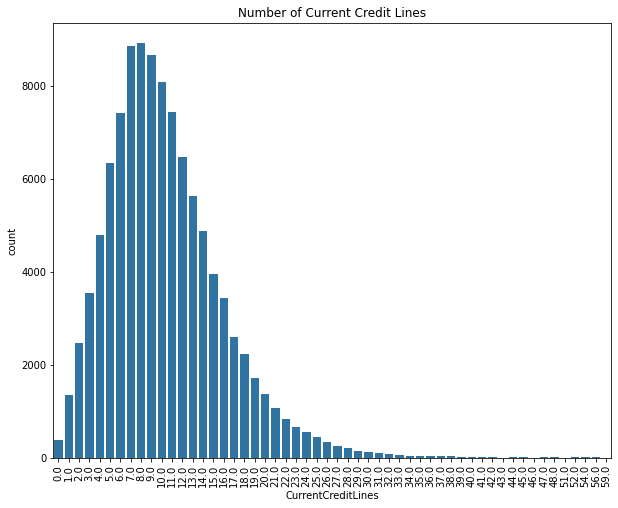

In [67]:
plt.figure(figsize=(10,8))
sb.countplot(data=df, x='CurrentCreditLines', color=pleasant)
plt.xticks(rotation=90)
plt.title('Number of Current Credit Lines');

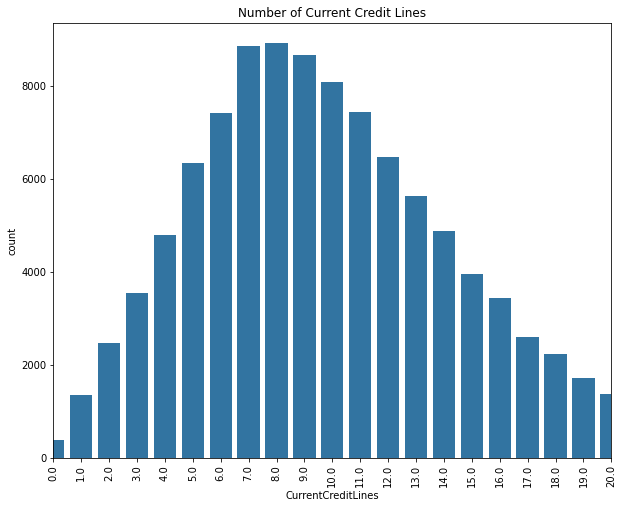

In [68]:
plt.figure(figsize=(10,8))
sb.countplot(data=df, x='CurrentCreditLines', color=pleasant)
plt.xlim(0,20)
plt.xticks(rotation=90)
plt.title('Number of Current Credit Lines');

### Notes:

It is slightly right-skewed with the mean just slightly higher than the median. There are some big outliers. It looks almost normal when I limited the x-axis.

In [69]:
print(f"median: {df.CurrentCreditLines.median()}, mean: {df.CurrentCreditLines.mean()}")

median: 10.0, mean: 10.307058466556674


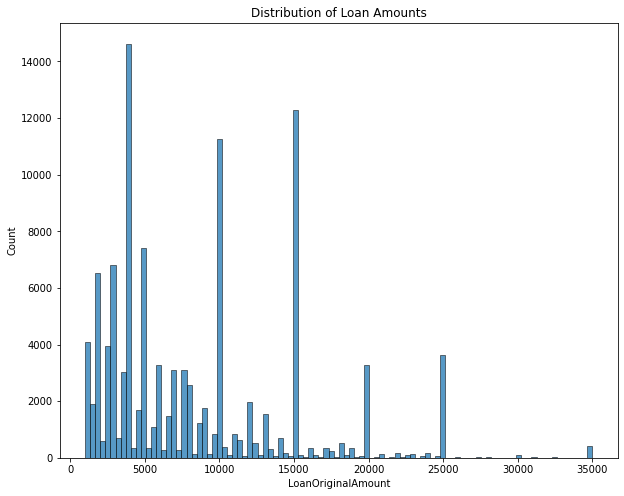

In [70]:
plt.figure(figsize=(10,8))
sb.histplot(data=df, x='LoanOriginalAmount', color=pleasant, bins=100)
plt.title('Distribution of Loan Amounts');

/home/nemo/miniconda3/envs/ml/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


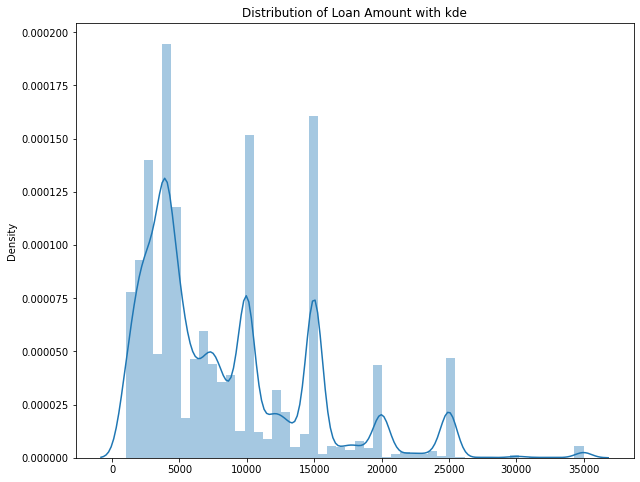

In [72]:
plt.figure(figsize=(10,8))
sb.distplot(x=df.LoanOriginalAmount, color=pleasant)
plt.title('Distribution of Loan Amount with kde');

### Notes:

I do not know what to make of this yet. The bumps look like the bank preferred to lend in increments of 5000. Big bump at 5000, then bumps at 10000, 15000, 20000, and 25000 (perhaps even at 30000 and 35000)

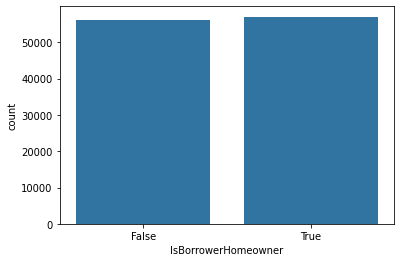

In [73]:
sb.countplot(data=df, x='IsBorrowerHomeowner', color=pleasant);

In [74]:
df.IsBorrowerHomeowner.value_counts()

True     57052
False    56014
Name: IsBorrowerHomeowner, dtype: int64

#### Note:

There are about as many homeowners than not.

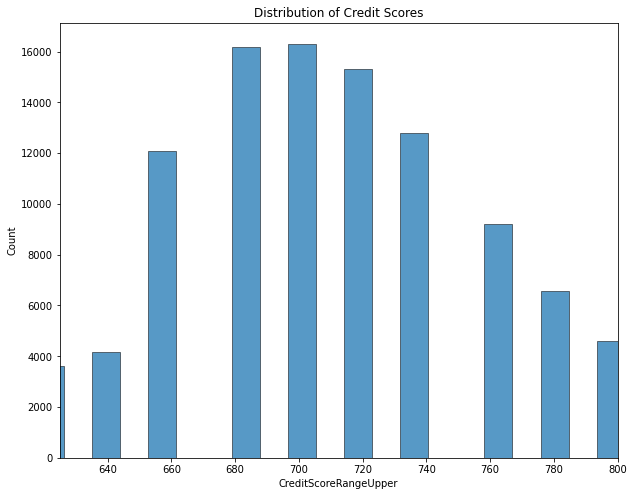

In [75]:
plt.figure(figsize=(10,8))
sb.histplot(data=df, x='CreditScoreRangeUpper', color=pleasant, bins=100)
plt.xlim(625,800)
plt.title('Distribution of Credit Scores');

#### Notes:

The credit score distribution looks almost normal with the mean and the median at around 700.

I will assume that CreditGrade has the same legend as ProsperRating which is 

The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.

I will create a numeric column based on CreditGrade

## Convert CreditGrade to number rating

In [76]:
df.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [77]:
pr_dict = {'NC': 0, 'HR': 1, 'E': 2, 'D': 3, 'C': 4, 'B': 5, 'A': 6, 'AA': 7}

In [78]:
df.CreditGrade.replace(pr_dict, inplace=True)

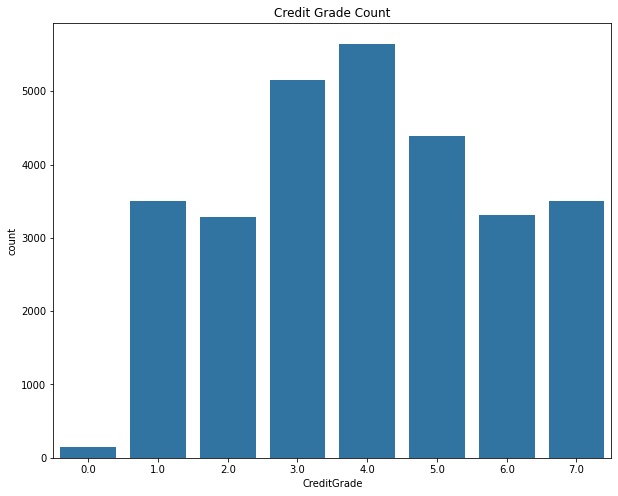

In [79]:
plt.figure(figsize=(10,8))
sb.countplot(data = df, x='CreditGrade', color=pleasant)
#plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Credit Grade Count');

In [80]:
df[['CreditGrade', 'ProsperRating']].describe()

,CreditGrade,ProsperRating
count,28953.000000,83982.000000
mean,3.956032,4.068705
std,1.870635,1.675442
min,0.000000,1.000000
25%,3.000000,3.000000
50%,4.000000,4.000000
75%,5.000000,5.000000
max,7.000000,7.000000


#### Notes:

If you discount, the 0 rating it looks normal. And the distribution is comparable to ProsperRating. This confirms that the alphabetic rating used in ProsperRating is the same as the alphabetic rating used in CreditGrade.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

My variable of interest the BorrowerRate since all the records have that. BorrowerRate has a lot of peaks. ProsperRating has a normal distribution. ProsperScore is not as normal as ProsperRating. Nevertheless, I will do some more cleaning below after I do some bivariate analysis. I attempted to do a transformation on employment duration. It confirmed that most borrowers worked at least 2 years.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

As I mentioned that there were some ListingKeys that had duplicates that only differed in their ProsperScore content. I believe these were clerical errors. I kept one of each duplicated Listing. But I created a new column called ProsperScoreRange so that I can examine the "incorrect" ProsperScores after I impute values into ProsperScore based on ProsperRating.

I converted the CreditGrade column to the numerical rating described in the description of ProsperRating in the Prosper's variable definitions. If you discount the 0 rating, CreditGrade looks normal. And the distribution is comparable to ProsperRating. This confirms that the alphabetic rating used in ProsperRating is the same as the alphabetic rating used in CreditGrade.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

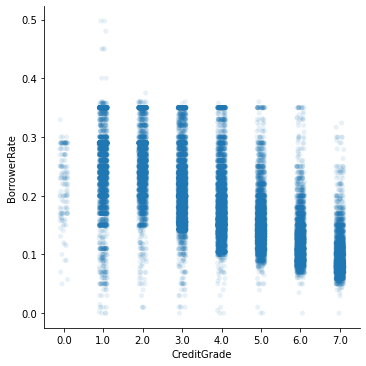

In [81]:
# Now I will create a new column combining ProsperRating and CreditGrade since they are mutually exclusive
# But first I would like to confirm that CreditGrade's relationship to BorrowerRate is similar to that of ProsperRating.
sb.catplot(data=df, x='CreditGrade', y='BorrowerRate', color=pleasant, alpha=0.1);

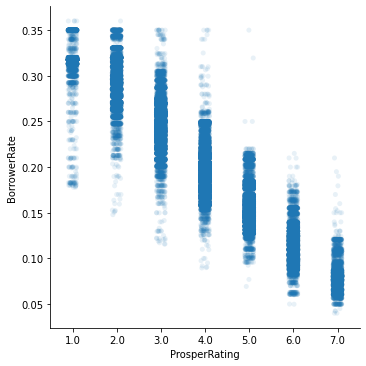

In [82]:
sb.catplot(data=df, x='ProsperRating', y='BorrowerRate', color=pleasant, alpha=0.1);

<AxesSubplot:xlabel='CreditGrade', ylabel='BorrowerRate'>

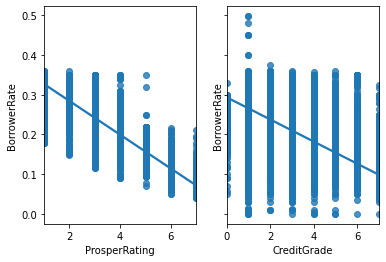

In [83]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sb.regplot(x='ProsperRating', y='BorrowerRate', ax=ax1, data=df)
sb.regplot(x='CreditGrade', y='BorrowerRate', ax=ax2, data=df)

### Notes:

I believe that they are similary correlated to BorrowerRate. It warrants that they be combine into one column. Remind that they are mutually exclusive CreditGrade (pre mid 2009), ProsperRating (post mid 2009).

<AxesSubplot:>

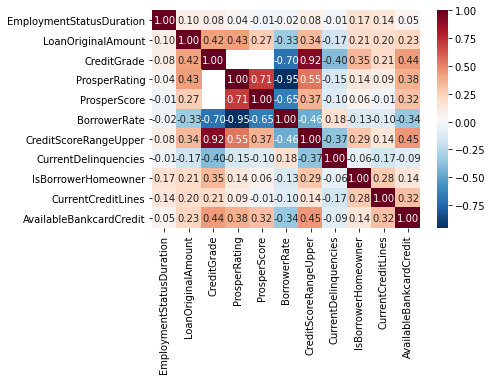

In [84]:
sb.heatmap(df.corr(), fmt='.2f', annot=True, cmap='RdBu_r')

#### Notes:

ProsperRating and ProsperScore are positively correlative

ProsperScore and ProsperRating are highly negatively correlative with BorrowerRate. Since all loans have a BorrowerRate, I believe that these 3 features are co-determined based on all the other features.

The heatmap confirms that ProsperRating and CreditGrade are in fact mutually exclusive. Their graphs also are comparable agains BorrowerRate. I will now combine ProsperRating and CreditGrade in one column.

## Combine CreditGrade and ProsperRating into one column

In [90]:
df[['CreditGrade', 'ProsperRating']].notnull().sum()

CreditGrade      28953
ProsperRating    83982
dtype: int64

In [86]:
df['ProsperRatingGrade'] = df['ProsperRating']

In [88]:
df.ProsperRatingGrade.update(df['CreditGrade'])
df.ProsperRatingGrade.isnull().sum()

131

### Notes:
All 113066 records accounted for.

In [91]:
df[['CreditGrade', 'ProsperRating', 'ProsperRatingGrade']].sample(1000).head(20)

,CreditGrade,ProsperRating,ProsperRatingGrade
59146,1.0,NaN,1.0
43274,NaN,6.0,6.0
88745,NaN,5.0,5.0
86301,NaN,5.0,5.0
73947,NaN,2.0,2.0
103216,NaN,1.0,1.0
108194,3.0,NaN,3.0
92420,1.0,NaN,1.0
70590,NaN,4.0,4.0
53871,NaN,3.0,3.0


#### Notes:

I successfully combined the CreditGrade and ProsperScore. I will now do more bivariate analysis

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


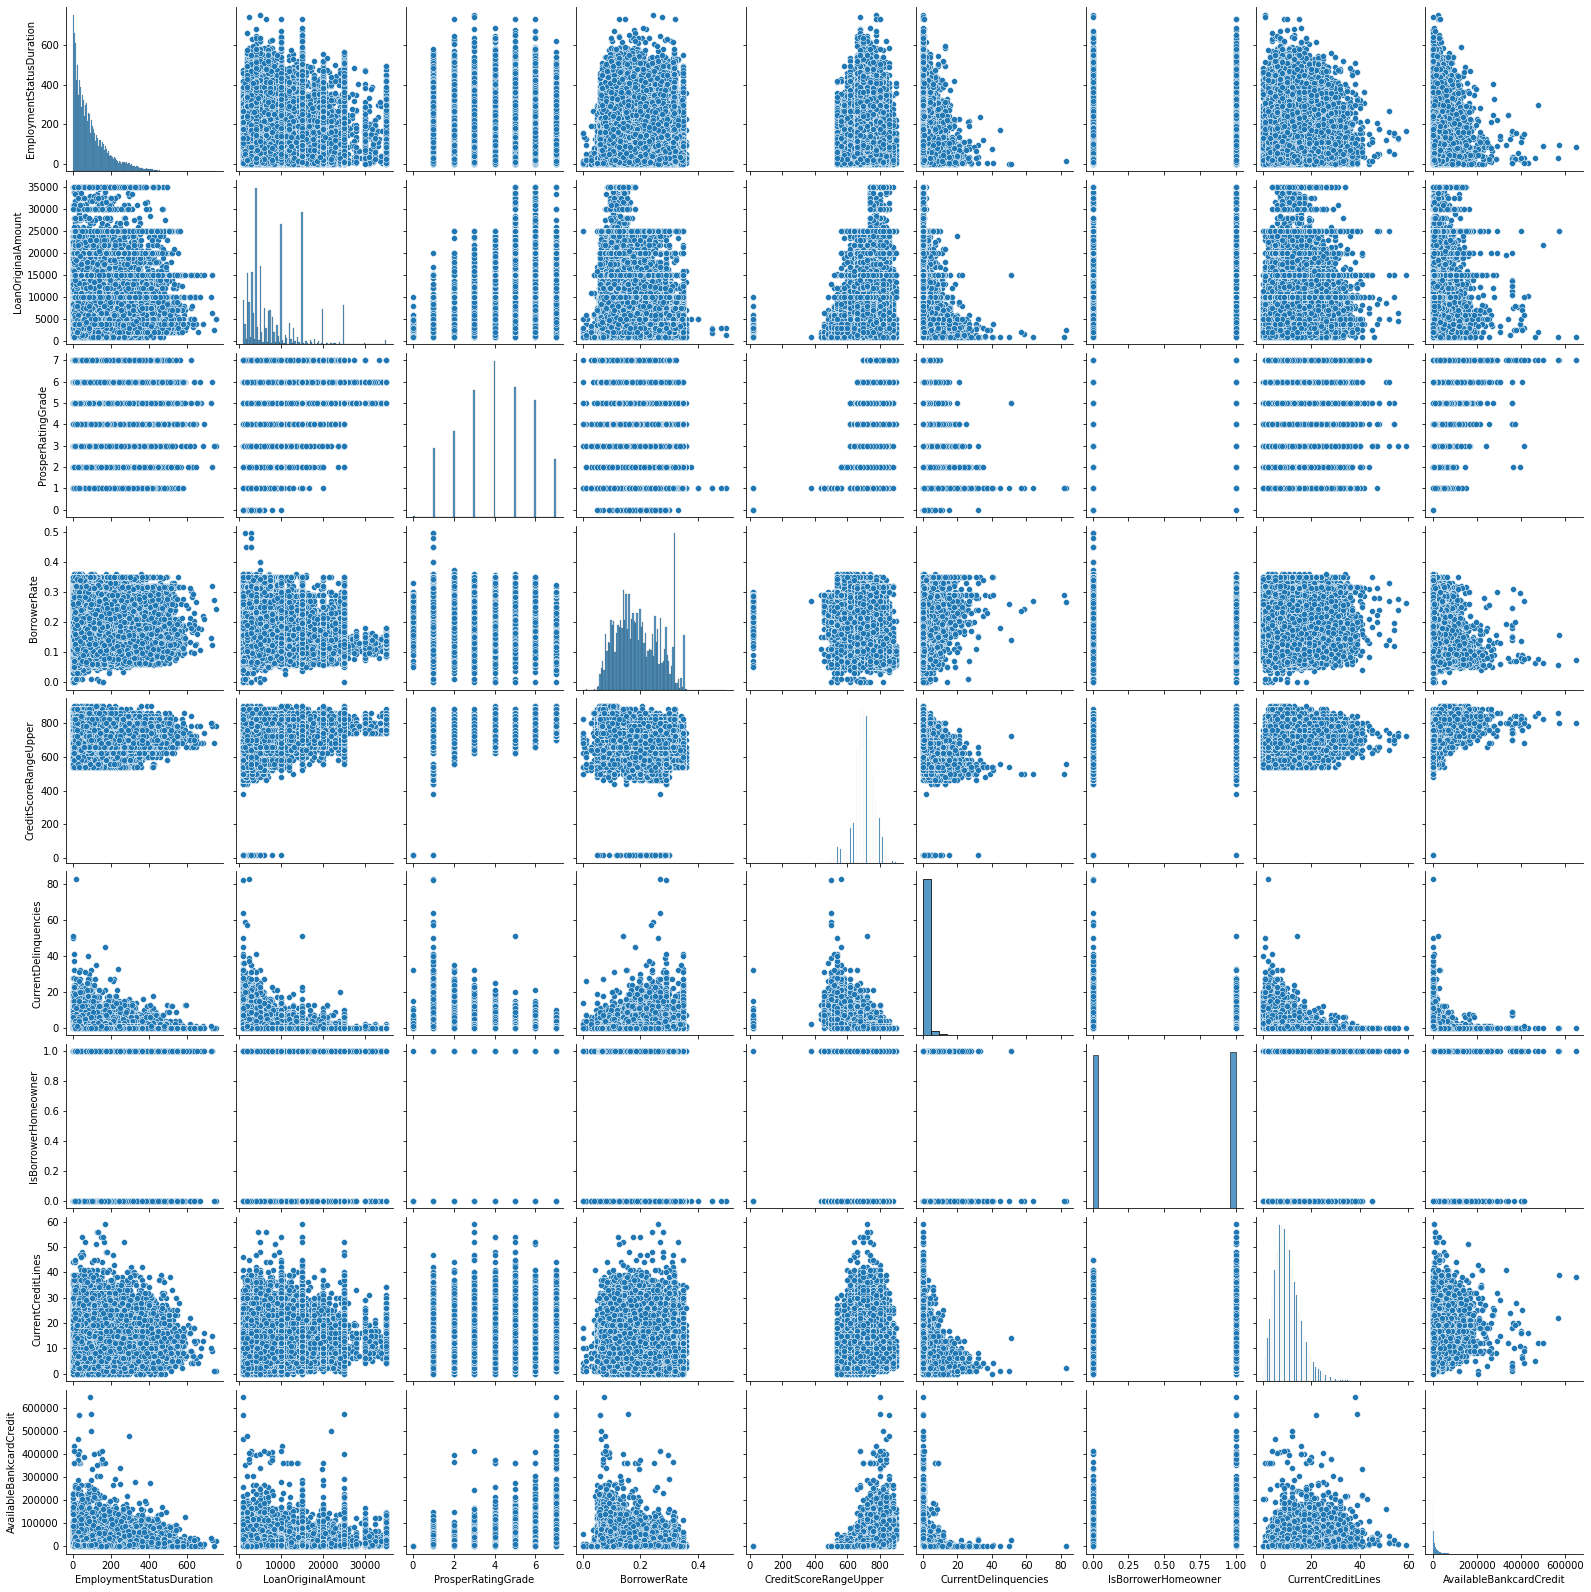

In [93]:
sb.pairplot(df[['EmploymentStatusDuration', 'EmploymentStatus', 'LoanOriginalAmount', 'ProsperRatingGrade', 'BorrowerRate', 'CreditScoreRangeUpper', 'CurrentDelinquencies', 'IsBorrowerHomeowner', 'CurrentCreditLines', 'AvailableBankcardCredit']])

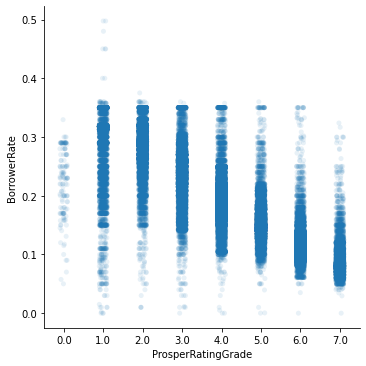

In [95]:
sb.catplot(data=df, x='ProsperRatingGrade', y='BorrowerRate', color=pleasant, alpha=0.1);

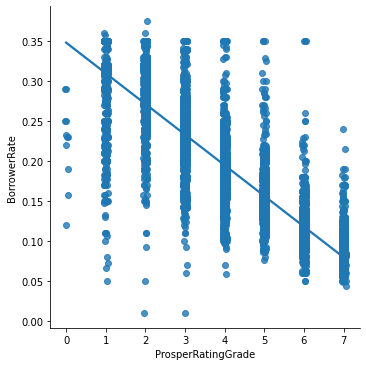

In [97]:
sb.lmplot(data=df.sample(11000), x='ProsperRatingGrade', y='BorrowerRate', x_jitter=.05)

#### Notes:

This shows that the higher the ProsperRatingGrade the lower BorrowerRate.

## Correcting ProsperScore

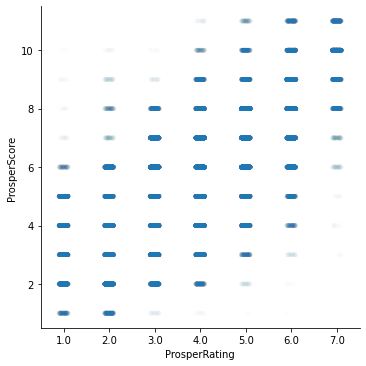

In [98]:
sb.catplot(data=df, x='ProsperRating', y='ProsperScore', color=pleasant, alpha=0.009)

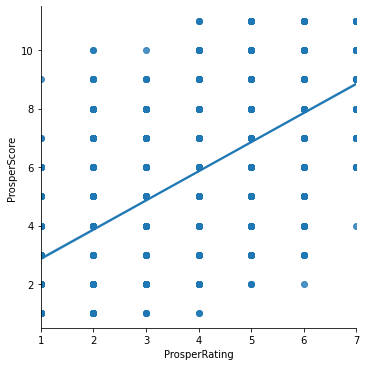

In [99]:
sb.lmplot(data=df.sample(11000), x='ProsperRating', y='ProsperScore')

In [100]:
# what is the average score in each rating
# get a temporary df without the dup IDs
temp_df = df[~df.ListingKey.isin(dup_listing_idx)]

In [101]:
temp_df.shape

(112239, 15)

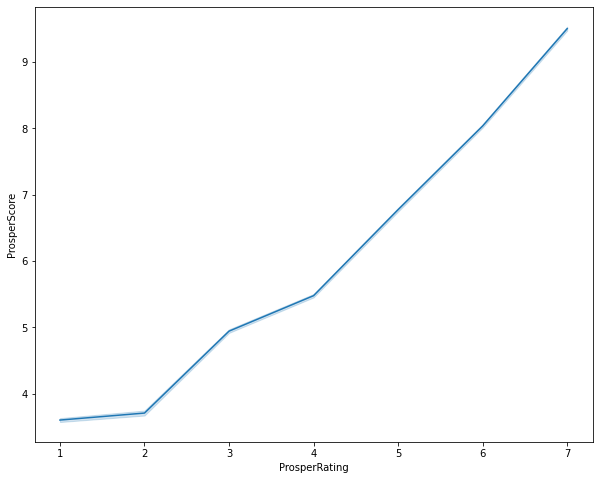

In [102]:
plt.figure(figsize=(10,8))
sb.lineplot(data=temp_df, x='ProsperRating', y='ProsperScore');

#### Notes:

The graph did not really change much. But I will use the opportunity to "correct" ProsperScore based on ProsperRating to get to know the data better

In [103]:
grptemp = temp_df.groupby('ProsperRating')

In [104]:
grptemp.mean()

,EmploymentStatusDuration,LoanOriginalAmount,CreditGrade,ProsperScore,BorrowerRate,CreditScoreRangeUpper,CurrentDelinquencies,IsBorrowerHomeowner,CurrentCreditLines,AvailableBankcardCredit,ProsperRatingGrade
ProsperRating,,,,,,,,,,,
1.0,94.697594,3461.917693,NaN,3.601942,0.317377,696.125054,0.587741,0.499348,9.575424,4365.688161,1.0
2.0,97.429713,4563.806826,NaN,3.707335,0.293678,681.587405,0.600581,0.425874,9.884220,4224.442473,2.0
3.0,99.074659,7064.762971,NaN,4.942928,0.246761,699.423596,0.422886,0.454016,9.808742,6043.630561,3.0
4.0,106.232066,10356.121095,NaN,5.477774,0.194795,709.124286,0.291401,0.510357,10.850521,8299.424029,4.0
5.0,108.572145,11579.995648,NaN,6.775551,0.154757,726.096136,0.233087,0.555255,10.781815,12063.486285,5.0
6.0,106.000632,11434.172087,NaN,8.037367,0.112972,749.370162,0.155510,0.614455,11.074103,18899.203062,6.0
7.0,102.123508,11547.407955,NaN,9.505303,0.079157,793.571970,0.053409,0.717803,10.923295,36323.288636,7.0


In [105]:
gm = grptemp.mean()
print(gm.ProsperScore.apply(np.ceil))

ProsperRating
1.0     4.0
2.0     4.0
3.0     5.0
4.0     6.0
5.0     7.0
6.0     9.0
7.0    10.0
Name: ProsperScore, dtype: float64


In [106]:
grptemp.median()

,EmploymentStatusDuration,LoanOriginalAmount,CreditGrade,ProsperScore,BorrowerRate,CreditScoreRangeUpper,CurrentDelinquencies,IsBorrowerHomeowner,CurrentCreditLines,AvailableBankcardCredit,ProsperRatingGrade
ProsperRating,,,,,,,,,,,
1.0,66.0,4000,NaN,4.0,0.3177,699.0,0.0,False,9.0,1233.0,1.0
2.0,68.0,4000,NaN,3.0,0.2925,679.0,0.0,False,9.0,1492.0,2.0
3.0,70.0,6000,NaN,5.0,0.2492,699.0,0.0,False,9.0,2429.0,3.0
4.0,77.0,10000,NaN,5.0,0.1915,699.0,0.0,True,10.0,3908.5,4.0
5.0,79.5,10000,NaN,7.0,0.1509,719.0,0.0,True,10.0,6278.0,5.0
6.0,77.0,10000,NaN,8.0,0.1119,739.0,0.0,True,10.0,11629.0,6.0
7.0,73.0,10500,NaN,10.0,0.0779,799.0,0.0,True,10.0,28181.0,7.0


#### Note:

I will use the mean scores obtained above to "correct" the ProsperScore in those duplicated indices with varying ProsperScore. Although I do not believe that this corrects the ProsperScore, I will use it for now. I will try to confirm by other means if my simple "correction" based on ProsperRating approximates truth. I did save the original ProsperScores in a new column called ProsperScoreRange.

In [108]:
# work with grouped mean dataframe and reset index
# then create a dictionary with ProsperRating as key and ProsperScore as value from mean() dataframe
gm = gm.reset_index() # necessary to use ProsperRating again as a column
p_score = dict(zip(gm.ProsperRating, gm.ProsperScore.apply(np.ceil)))
p_score

{1.0: 4.0, 2.0: 4.0, 3.0: 5.0, 4.0: 6.0, 5.0: 7.0, 6.0: 9.0, 7.0: 10.0}

In [112]:
#df = work_df.copy()

In [109]:
work_df = df.copy() # just another backup of working dataframe

In [113]:
# with working dataframe df, for each Listing key in dup_listing_idx
# change the ProsperScore to the corresponding one in the ps_score dictionary
# I tried the declarative way below. But I experimented too much. I will use procedural way instead.
#work_df.loc[work_df.ListingKey.isin(dup_listing_idx), 'ProsperScore'] = work_df.ProsperScore.map(p_score)
for idx in dup_listing_idx:
    pr = float(df[df.ListingKey==idx]['ProsperRating']) # get the ProsperRating to use for dict lookup
    df.loc[(df.ListingKey==idx), 'ProsperScore'] = p_score.get(pr)

In [114]:
#peek_df = work_df[work_df.ListingKey.eq('09233589620788733CFB8CE')]
peek_df = df[df.ListingKey.isin(dup_listing_idx)]
peek_df[['CreditGrade', 'ProsperRating', 'ProsperScore', 'ProsperRatingGrade', 'ProsperScoreRange']].head(20)

,CreditGrade,ProsperRating,ProsperScore,ProsperRatingGrade,ProsperScoreRange
8,NaN,7.0,10.0,7.0,"9.0,11.0"
28,NaN,6.0,9.0,6.0,"5.0,6.0"
175,NaN,2.0,4.0,2.0,"2.0,3.0"
312,NaN,5.0,7.0,5.0,"2.0,3.0"
348,NaN,5.0,7.0,5.0,"2.0,5.0"
441,NaN,4.0,6.0,4.0,"3.0,4.0"
443,NaN,4.0,6.0,4.0,"4.0,7.0"
454,NaN,5.0,7.0,5.0,"6.0,9.0"
460,NaN,4.0,6.0,4.0,"6.0,8.0"
639,NaN,6.0,9.0,6.0,"8.0,10.0"


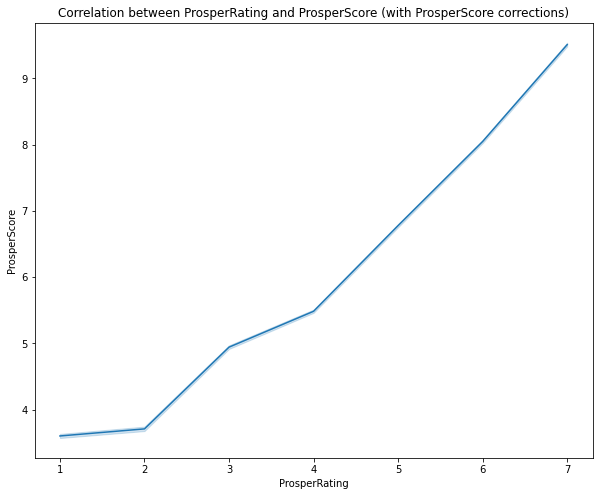

In [115]:
plt.figure(figsize=(10,8))
sb.lineplot(data=df, x='ProsperRating', y='ProsperScore')
plt.title('Correlation between ProsperRating and ProsperScore (with ProsperScore corrections)');

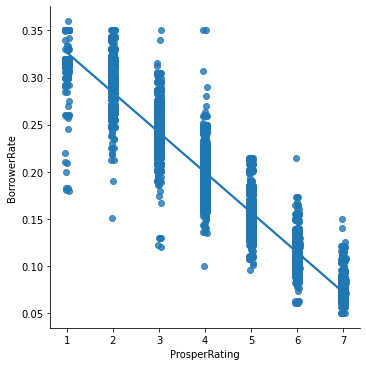

In [116]:
sb.lmplot(data=df.sample(10000), x='ProsperRating', y='BorrowerRate', x_jitter=.05)
#sb.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

In [120]:
t_cols = list(df.columns)
print(t_cols)

['ListingKey', 'EmploymentStatusDuration', 'EmploymentStatus', 'LoanOriginalAmount', 'CreditGrade', 'ProsperRating', 'ProsperScore', 'ProsperScoreRange', 'BorrowerRate', 'CreditScoreRangeUpper', 'CurrentDelinquencies', 'IsBorrowerHomeowner', 'CurrentCreditLines', 'AvailableBankcardCredit', 'ProsperRatingGrade']


In [121]:
t_cols = ['BorrowerRate', 'LoanOriginalAmount', 'CreditScoreRangeUpper', 'ProsperRatingGrade']

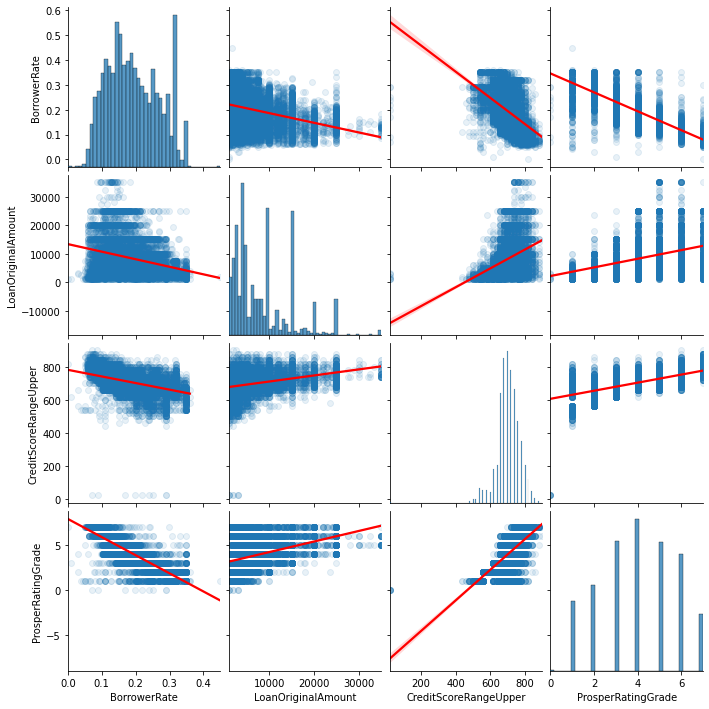

In [122]:
sb.pairplot(df[t_cols].sample(10000), kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

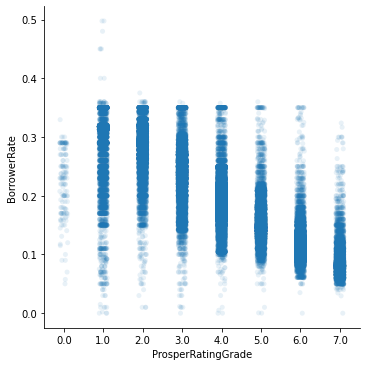

In [123]:
sb.catplot(data=df, x='ProsperRatingGrade', y='BorrowerRate', color=pleasant, alpha=0.1)

### Notes:

As I mentioned before it didn't make a difference in the big picture.

I drew the graph first with the line and then a form of a scatterplot indicating density of points. It is clear to me now that ProsperRating is ordinal. The higher the ProsperRating the lower the BorrowerRate.

In [124]:
temp_df = df[['BorrowerRate', 'ProsperRatingGrade']]
temp_df.isnull().sum()

BorrowerRate            0
ProsperRatingGrade    131
dtype: int64

In [125]:
temp_df = temp_df.dropna()
temp_df.isnull().sum()

BorrowerRate          0
ProsperRatingGrade    0
dtype: int64

In [126]:
temp_df.shape

(112935, 2)

### Notes:

temp_df.shape

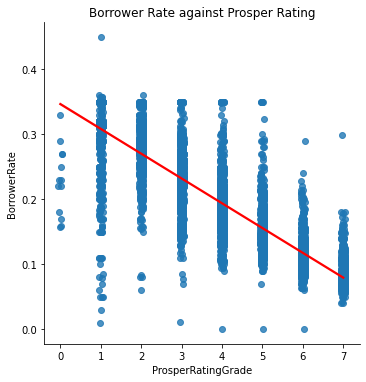

In [129]:
sb.lmplot(data=temp_df.sample(10000), x='ProsperRatingGrade', y='BorrowerRate', x_jitter=.05, line_kws={'color':'red'})
plt.title('Borrower Rate against Prosper Rating');

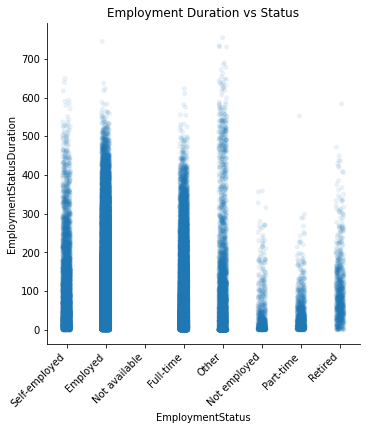

In [130]:
sb.catplot(data=df, x='EmploymentStatus', y='EmploymentStatusDuration', color=pleasant, alpha=0.1)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Employment Duration vs Status');

I thought there might be a relationship between emploment status and duration. I don't see much.

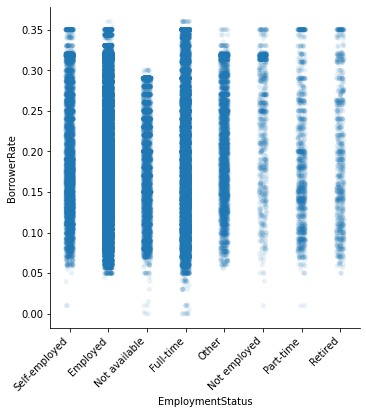

In [131]:
sb.catplot(data=df, x='EmploymentStatus', y='BorrowerRate', color=pleasant, alpha=0.1)
plt.xticks(rotation=45, horizontalalignment='right');

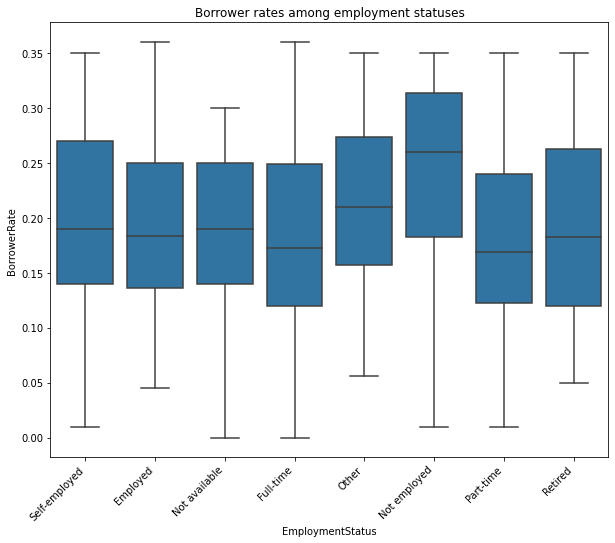

In [134]:
plt.figure(figsize=(10,8))
sb.boxplot(data=df, x='EmploymentStatus', y='BorrowerRate', color=pleasant)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Borrower rates among employment statuses');

In [135]:
df.EmploymentStatus.value_counts()

Employed         66598
Full-time        26354
Self-employed     6052
Not available     5347
Other             3742
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

### Notes:

there's a definite range of rates given to the first 5 statuses.

<AxesSubplot:>

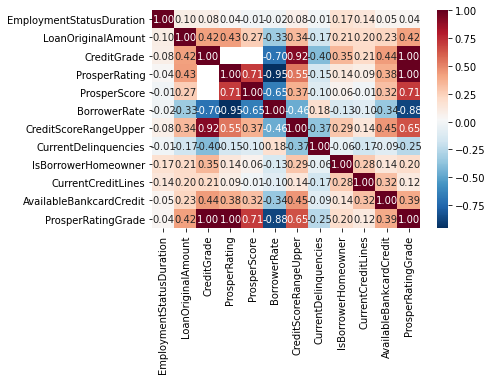

In [136]:
sb.heatmap(df.corr(), fmt='.2f', annot=True, cmap='RdBu_r')

<Figure size 720x576 with 0 Axes>

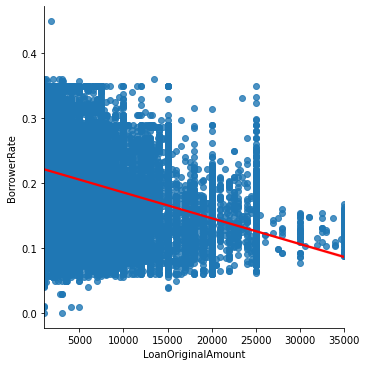

In [137]:
plt.figure(figsize=(10,8))
sb.lmplot(data=df.sample(frac=.25), x='LoanOriginalAmount', y='BorrowerRate', line_kws={'color': 'red'});

<Figure size 720x576 with 0 Axes>

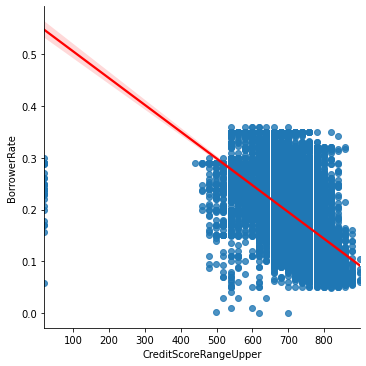

In [138]:
plt.figure(figsize=(10,8))
sb.lmplot(data=df.sample(frac=.25), x='CreditScoreRangeUpper', y='BorrowerRate', line_kws={'color': 'red'});

In [139]:
df.CreditScoreRangeUpper.isnull().sum()

591

In [140]:
df.CreditScoreRangeUpper.describe()

count    112475.000000
mean        704.524961
std          66.635895
min          19.000000
25%         679.000000
50%         699.000000
75%         739.000000
max         899.000000
Name: CreditScoreRangeUpper, dtype: float64

#### Notes:

- With those that had a credit scores, it looks that the higher the credit score the better the BorrowerRate.
- A minimum of 19 in Credit Score is probably an clerical error.
- Prosper only lent money to people with credit scores above 400.

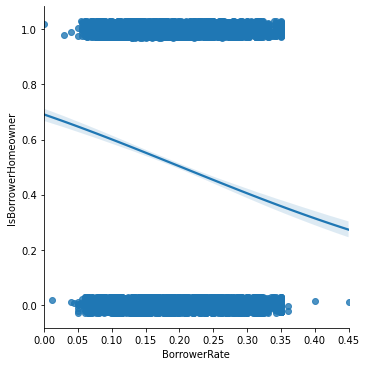

In [141]:
# computationally expensive using sample

sb.lmplot(x="BorrowerRate", y="IsBorrowerHomeowner", data=df.sample(10000), logistic=True, y_jitter=.03);

### Notes:

It looks as if they disbursed funds regardless of homeownership. However, it benefits that you are a homeowner in that the BorrowerRate is lower if you are a homeowner

<Figure size 720x576 with 0 Axes>

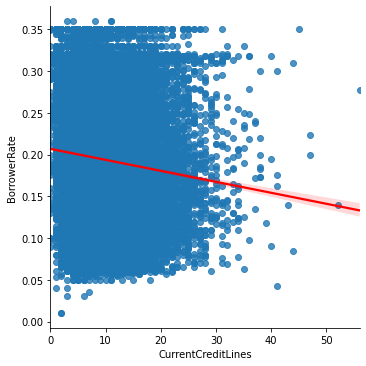

In [142]:
plt.figure(figsize=(10,8))
sb.lmplot(data=df.sample(frac=.25), x='CurrentCreditLines', y='BorrowerRate', line_kws={'color': 'red'});

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- BorrowerRate correlates with CreditScoreRangeUpper: the better the score the lower the rate.
- BorrowerRate correlates with ProsperRating: the higher the rating the lower the rate.
- BorrowerRate slightly correlates with loan amount: the higher the amount the lower the rate. that is interesting.
- It looks as if they disbursed funds regardless of homeownership. However, it benefits that you are a homeowner in that the BorrowerRate is lower if you are a homeowner.
- Most borrowers have fewer than 25 credit lines. But the tendency is that the more credit line you have, the lower the BorrowerRate.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

T

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!